<a href="https://colab.research.google.com/github/2303A52155/AIML_2303A52155/blob/main/LAB_EXAM_SET_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Build a decision tree classifier and visualize the tree.

   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0    23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1    27.879734  46.489704    5.952484     4.990053   992.614190  no rain
2    25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3    23.622080  74.367758    7.050551    67.255282   982.632013     rain
4    20.591370  96.858822    4.643921    47.676444   980.825142  no rain
Model Accuracy: 1.00


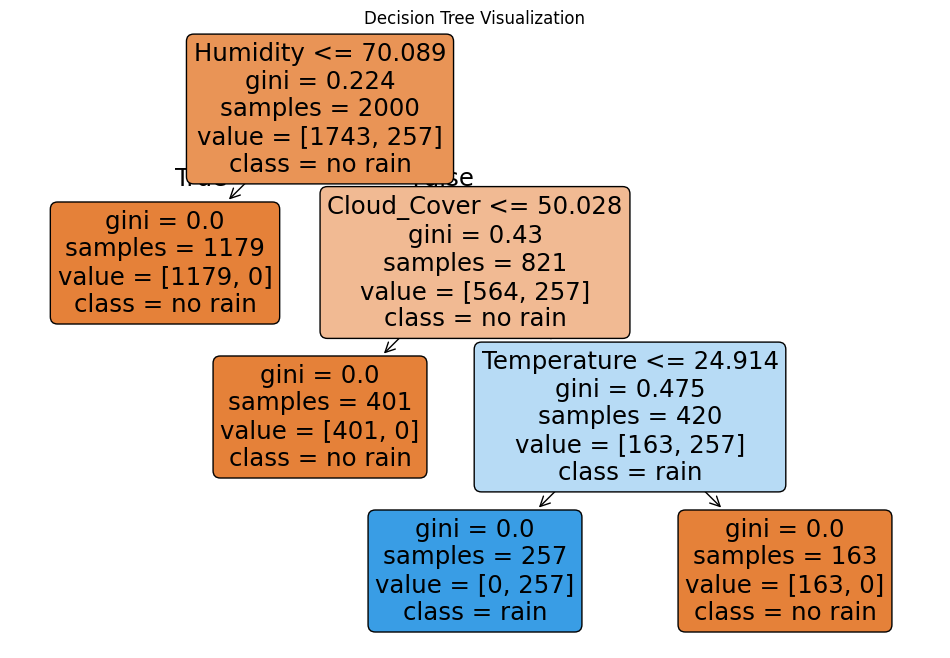

|--- Humidity <= 70.09
|   |--- class: no rain
|--- Humidity >  70.09
|   |--- Cloud_Cover <= 50.03
|   |   |--- class: no rain
|   |--- Cloud_Cover >  50.03
|   |   |--- Temperature <= 24.91
|   |   |   |--- class: rain
|   |   |--- Temperature >  24.91
|   |   |   |--- class: no rain



In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv('/content/weather_forecast_data.csv')

print(data.head())

X = data.iloc[:, :-1]
y = data.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)


2.Evaluate the model's performance using accuracy and confusion matrix.

Model Accuracy: 1.00
Confusion Matrix:
[[443   0]
 [  0  57]]


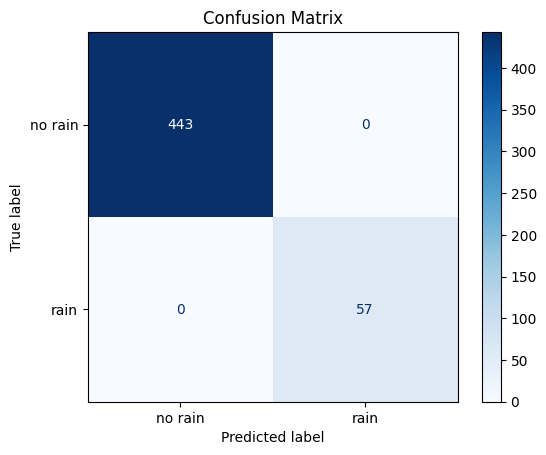

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(f"Model Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


3. Implement pruning (set max_depth or min_samples_split) and compare
accuracy.

Original Model Accuracy: 1.00
Pruned Model Accuracy: 1.00


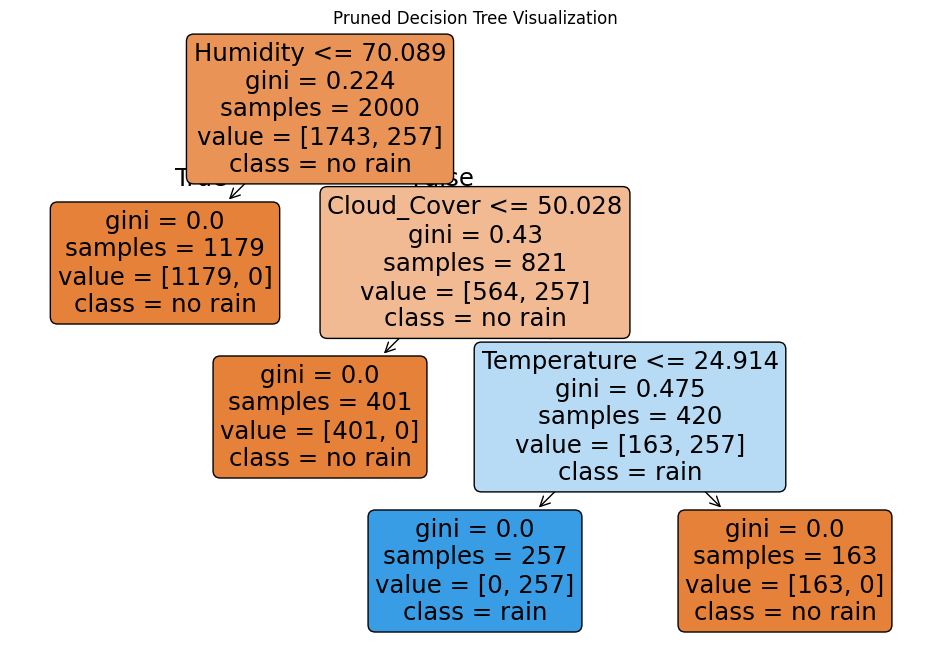

Pruned Model Confusion Matrix:
[[443   0]
 [  0  57]]


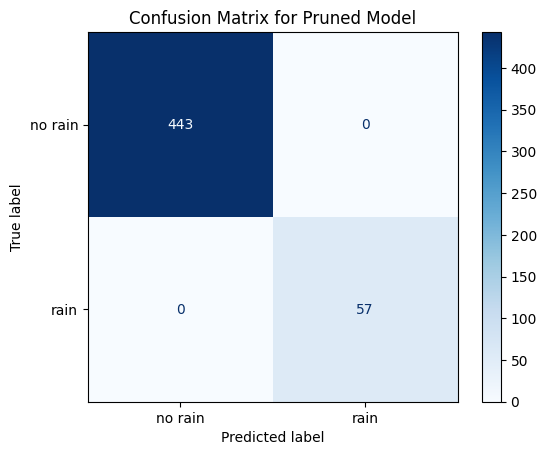

In [3]:
clf_pruned = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_split=10)

clf_pruned.fit(X_train, y_train)

y_pred_pruned = clf_pruned.predict(X_test)

accuracy_pruned = accuracy_score(y_test, y_pred_pruned)

print(f"Original Model Accuracy: {accuracy:.2f}")
print(f"Pruned Model Accuracy: {accuracy_pruned:.2f}")

plt.figure(figsize=(12, 8))
plot_tree(clf_pruned, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.title("Pruned Decision Tree Visualization")
plt.show()

conf_matrix_pruned = confusion_matrix(y_test, y_pred_pruned)
print("Pruned Model Confusion Matrix:")
print(conf_matrix_pruned)

disp_pruned = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_pruned, display_labels=clf.classes_)
disp_pruned.plot(cmap="Blues")
plt.title("Confusion Matrix for Pruned Model")
plt.show()


4. Use the decision tree to identify the most important feature(s).

Feature Importances:
       Feature  Importance
0  Temperature    0.445319
3  Cloud_Cover    0.342940
1     Humidity    0.211742
2   Wind_Speed    0.000000
4     Pressure    0.000000


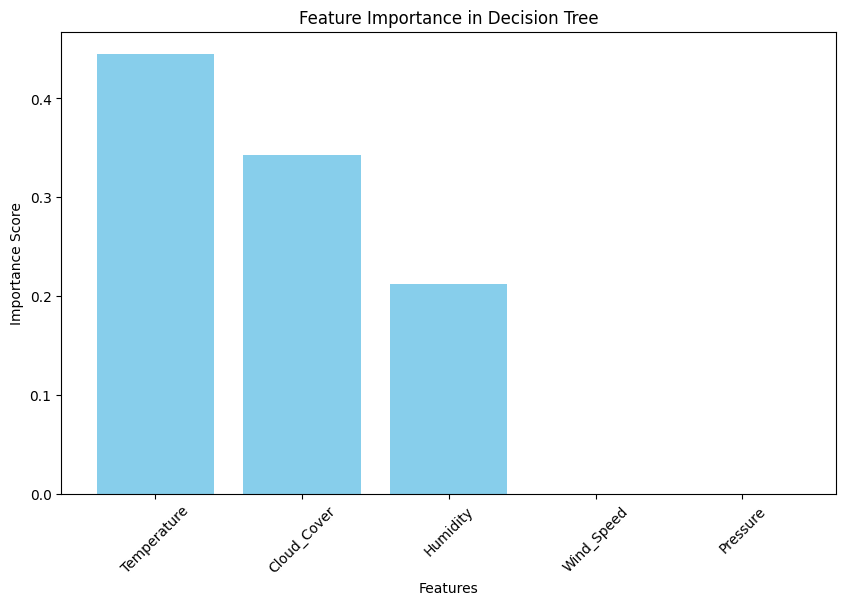

In [4]:
feature_importances = clf_pruned.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance in Decision Tree')
plt.xticks(rotation=45)
plt.show()


5. Compare the decision tree model’s performance with and without pruning.

Accuracy of Original Model: 1.00
Accuracy of Pruned Model: 1.00

Confusion Matrix of Original Model:
[[443   0]
 [  0  57]]

Confusion Matrix of Pruned Model:
[[443   0]
 [  0  57]]

Depth of Original Model: 3
Depth of Pruned Model: 3

Visualizing Original Decision Tree:


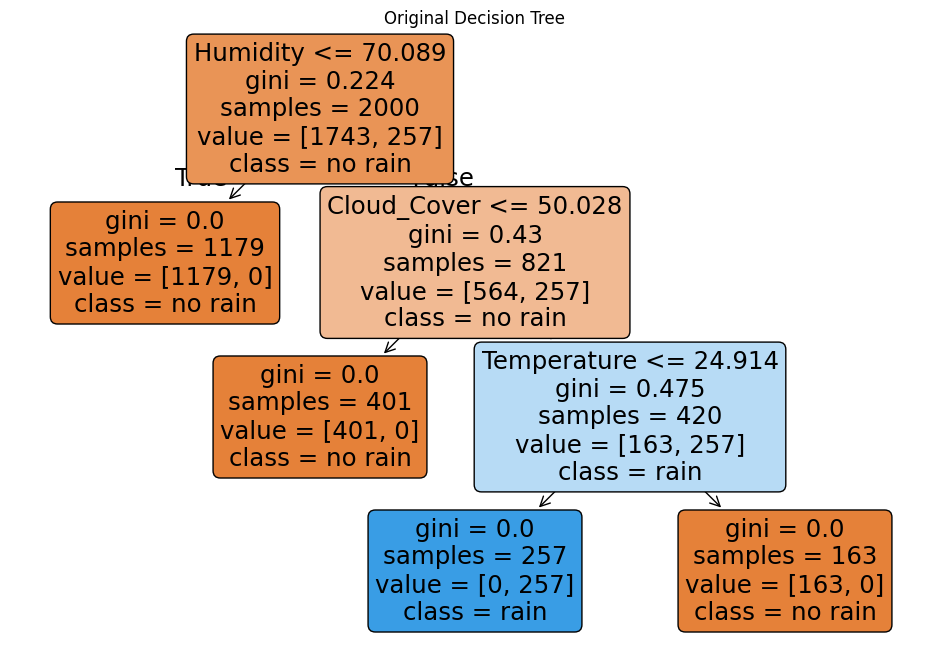


Visualizing Pruned Decision Tree:


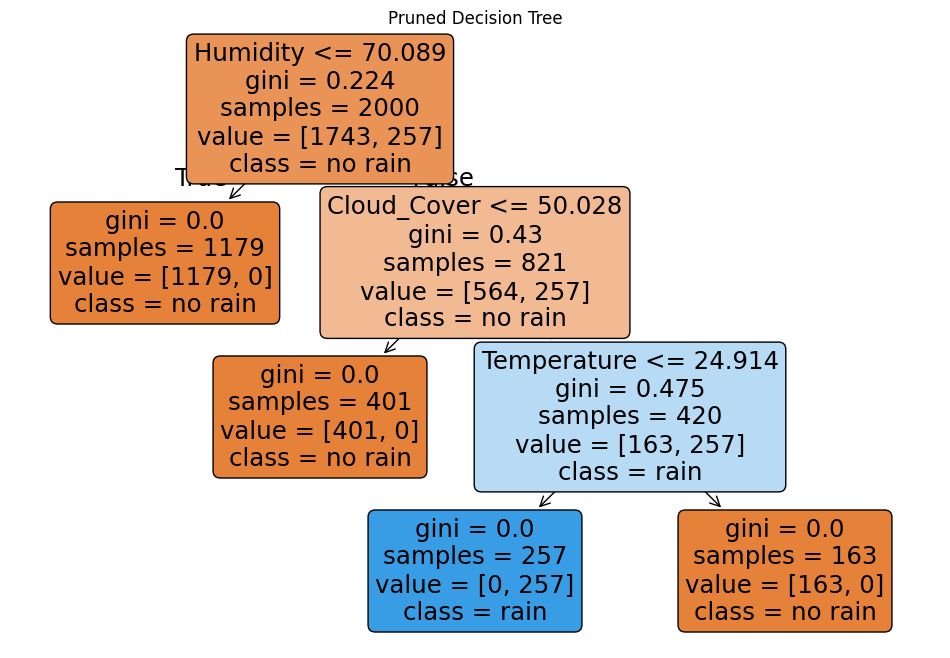

In [5]:
print(f"Accuracy of Original Model: {accuracy:.2f}")
print(f"Accuracy of Pruned Model: {accuracy_pruned:.2f}")

print("\nConfusion Matrix of Original Model:")
print(conf_matrix)

print("\nConfusion Matrix of Pruned Model:")
print(conf_matrix_pruned)

print(f"\nDepth of Original Model: {clf.get_depth()}")
print(f"Depth of Pruned Model: {clf_pruned.get_depth()}")

print("\nVisualizing Original Decision Tree:")
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.title("Original Decision Tree")
plt.show()

print("\nVisualizing Pruned Decision Tree:")
plt.figure(figsize=(12, 8))
plot_tree(clf_pruned, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.title("Pruned Decision Tree")
plt.show()
